# Analysis

Features Overview: 
| Column             | Description |
|--------------------|-------------|
| `age`              | Age of the client (years) |
| `income`           | Annual income of the client (with "złoty" added as currency) |
| `children`         | Number of children the client has; 0 is encoded as "none" |
| `credit_history`   | Credit history status: "no history," "good history," "bad history" |
| `overdue_payments` | Status of overdue payments: "no overdue" or "overdue" |
| `active_loans`     | Number of active loans held by the client |
| `years_in_job`     | Number of years in current employment |
| `employment_type`  | Employment status (e.g., "self-employed," "permanent") |
| `owns_property`    | Whether the client owns property: "yes" or "no" |
| `assets_value`     | Value of assets owned (with "złoty" as currency) |
| `other_loans`      | Number of other loans held by the client |
| `education`        | Education level (e.g., "higher," "secondary") |
| `city`             | Size category of the city of residence (e.g., "small," "medium," "large") |
| `marital_status`   | Marital status of the client |
| `support_indicator`| An auxiliary metric introduced in data generation |
| `credit_risk`      | Target variable: 0 (low risk) or 1 (high risk) |


## Let's get the basic idea of distribution of dataset

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chisquare

from IPython.display import display, Markdown

In [3]:
data = pd.read_csv("cleared_data.csv")
data = data.apply(lambda column: column.astype("category") if column.dtype == "object" else column)
del data["Unnamed: 0"]

data["age"] = data["age"].astype(np.float64)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               10000 non-null  float64 
 1   income            8000 non-null   float64 
 2   children          10000 non-null  int64   
 3   credit_history    8000 non-null   category
 4   overdue_payments  8000 non-null   float64 
 5   active_loans      10000 non-null  int64   
 6   years_in_job      10000 non-null  int64   
 7   employment_type   10000 non-null  category
 8   owns_property     8000 non-null   float64 
 9   assets_value      8000 non-null   float64 
 10  other_loans       10000 non-null  int64   
 11  education         10000 non-null  int64   
 12  city              10000 non-null  int64   
 13  marital_status    10000 non-null  category
 14  credit_risk       10000 non-null  int64   
dtypes: category(3), float64(5), int64(7)
memory usage: 967.4 KB


In [5]:
data.describe()

,age,income,children,overdue_payments,active_loans,years_in_job,owns_property,assets_value,other_loans,education,city,credit_risk
count,10000.000000,8000.000000,10000.000000,8000.000000,10000.000000,10000.000000,8000.000000,8000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,39.527000,23598.621250,0.983600,0.488625,1.497900,9.524300,0.596000,80349.420250,0.390600,0.91290,0.796900,0.032500
std,9.874899,9717.329753,1.235105,0.659488,1.223824,4.869803,0.490728,70517.033919,0.487909,0.70083,0.750671,0.177333
min,18.000000,3202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,15778.000000,0.000000,0.000000,1.000000,6.000000,0.000000,34335.250000,0.000000,0.00000,0.000000,0.000000
50%,39.000000,22083.000000,0.000000,0.000000,1.000000,9.000000,1.000000,59565.000000,0.000000,1.00000,1.000000,0.000000
75%,46.000000,31066.500000,2.000000,1.000000,2.000000,13.000000,1.000000,102015.000000,1.000000,1.00000,1.000000,0.000000
max,70.000000,40000.000000,5.000000,2.000000,8.000000,30.000000,1.000000,500000.000000,1.000000,2.00000,2.000000,1.000000


## Now Let's visualise the data distribution

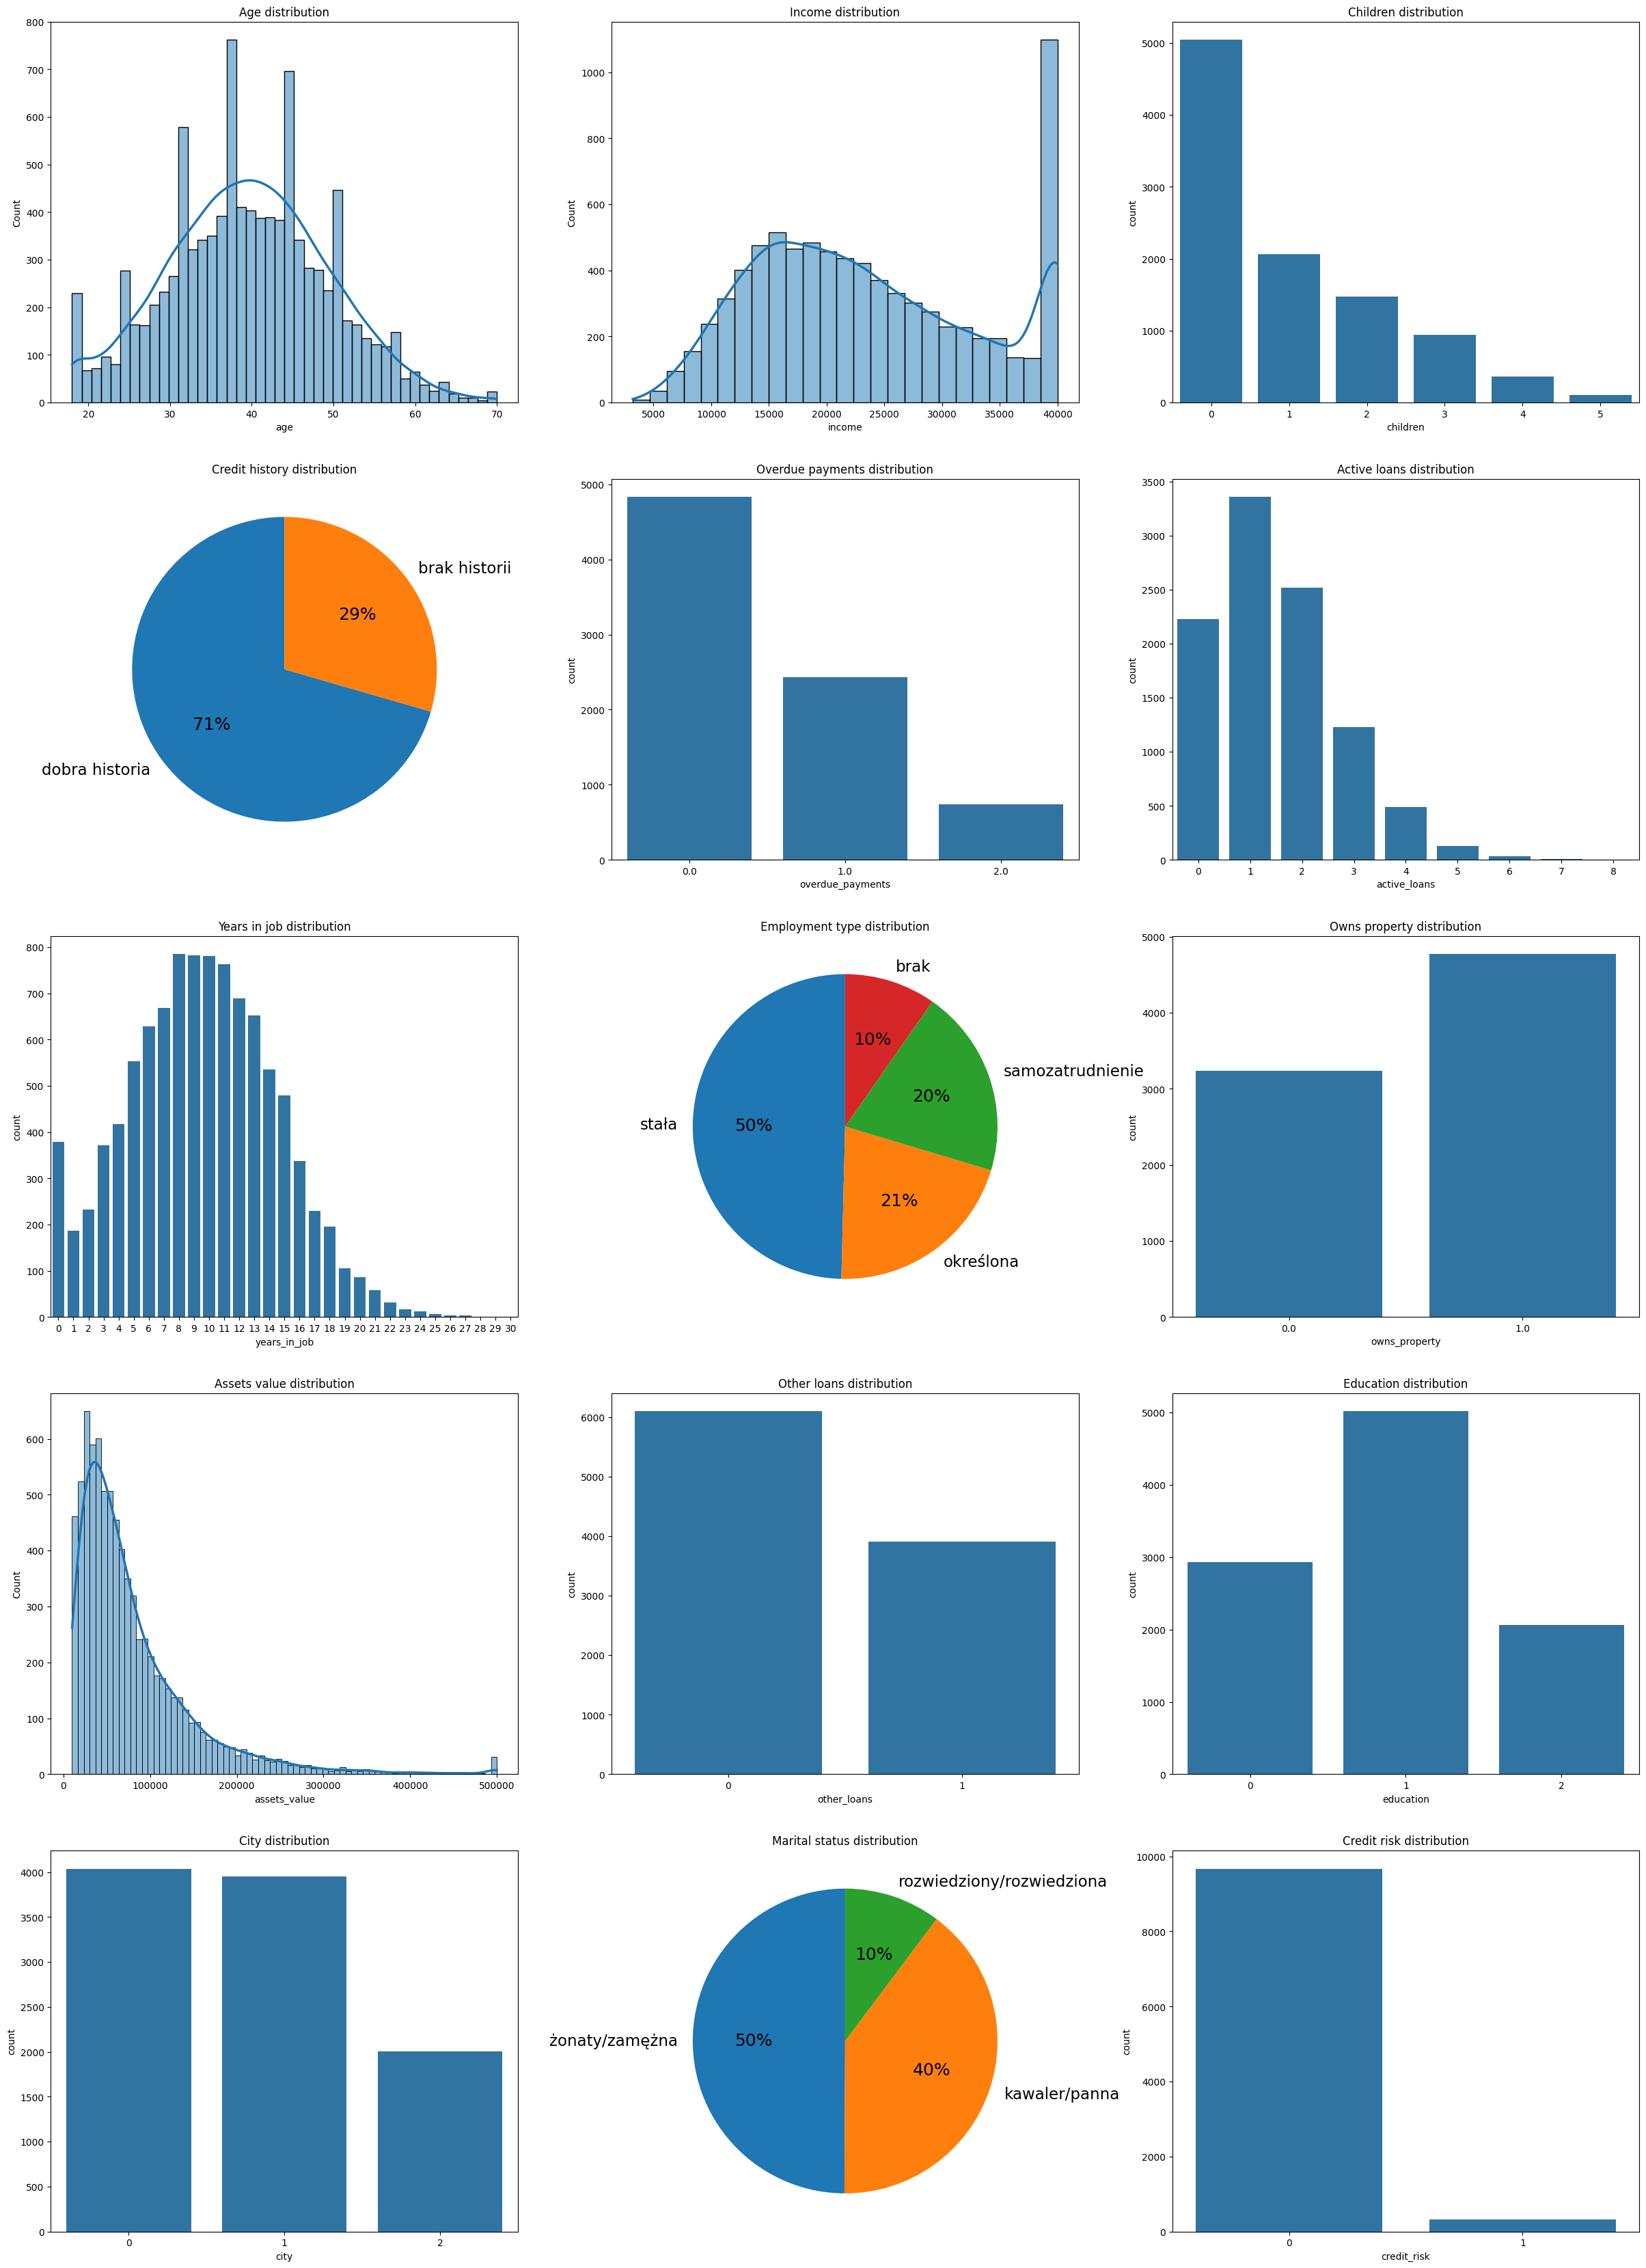

In [6]:
fig, ax = plt.subplots(5, 3)
fig.set_size_inches(30,42)


# helper variables for subplots assignment
col = 0
row = 0

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

for column in data.columns:

    if row == 3:
        col += 1
        row = 0

    non_nan_data = data[column][data[column].notna()] # we don't want to visualise nans
    # handle diffrent datatypes
    # #categorical features will be visualised by pie plot
    if data[column].dtype == "category":
        val_count = non_nan_data.value_counts()
        ax[col, row].pie(val_count, autopct='%.0f%%', labels=val_count.keys(), startangle=90)

    elif data[column].dtype == np.float64 and data[column].max() > 10.:
        sns.histplot(data[column], ax=ax[col,row], kde=True) 
    
    else: 
        val_count = non_nan_data.value_counts()
        
        sns.barplot(val_count, ax = ax[col, row])
        
        
    ax[col, row].title.set_text(column.replace("_", " ").capitalize() + " distribution")

    row += 1

## Lets now look at correlation in our data

In [7]:
corr_data = data.select_dtypes(exclude="category").corr()

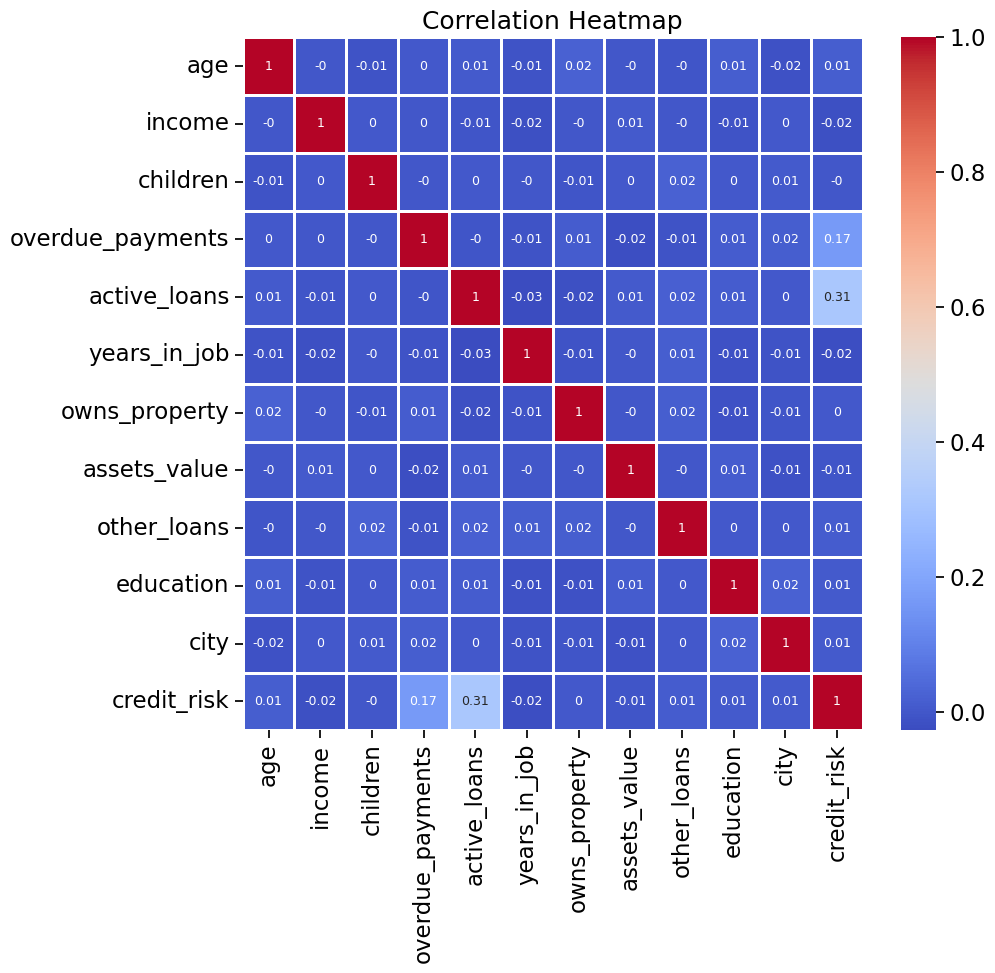

In [8]:
corr_fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(corr_data, cmap="coolwarm",
            annot=corr_data.values.round(2),
            annot_kws={"fontsize":9},
            linewidths=2,
            ax = ax)
ax.title.set_text("Correlation Heatmap")

In [9]:
stack = list(corr_data.columns)
sorted_corr = pd.DataFrame(columns=["one_feat", "two_feat", "corr", "abs_corr"])
while(stack):
    current_column = stack.pop()
    for next_column in stack:
        corr = corr_data.loc[current_column][next_column]
        sorted_corr = sorted_corr._append({"one_feat":current_column,
                                            "two_feat": next_column,
                                            "corr": corr,
                                            "abs_corr": np.abs(corr)}, ignore_index=True)

sorted_corr.sort_values(by="abs_corr", ascending=False, inplace=True) # we want to sort by absolute value of correlation, so that negative values wont be ignored
del sorted_corr["abs_corr"]
display(Markdown("### Table with biggest correlations"))
display(Markdown(sorted_corr.iloc[:10].reset_index(drop=True).to_markdown()))

/tmp/ipykernel_12489/46854053.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sorted_corr = sorted_corr._append({"one_feat":current_column,


### Table with biggest correlations

|    | one_feat      | two_feat         |       corr |
|---:|:--------------|:-----------------|-----------:|
|  0 | credit_risk   | active_loans     |  0.314366  |
|  1 | credit_risk   | overdue_payments |  0.167422  |
|  2 | years_in_job  | active_loans     | -0.0274784 |
|  3 | owns_property | age              |  0.0232554 |
|  4 | other_loans   | children         |  0.0217503 |
|  5 | city          | education        |  0.0213101 |
|  6 | credit_risk   | years_in_job     | -0.0201968 |
|  7 | other_loans   | active_loans     |  0.0197976 |
|  8 | assets_value  | overdue_payments | -0.0197935 |
|  9 | credit_risk   | income           | -0.0190271 |

We can see low correlation between `credit risk` and `active_loans`, but there is no big deal \
Also `credit_risk` and `overdue_payments` shows very low correlation \
Maybe categorical features better explain target distribution? \ 

## Now let's look at diffrences between populations with high and low credit risk

In [35]:
high_credit_data = data[data["credit_risk"] == 1]
low_credit_data  = data[data["credit_risk"] == 0]

display(Markdown(f"Dataset is **EXTREMELY** unbalanced ({len(high_credit_data)} vs {len(low_credit_data)}), *sigh*"))

Dataset is **EXTREMELY** unbalanced (325 vs 9675), *sigh*

### First, look at categorical variables


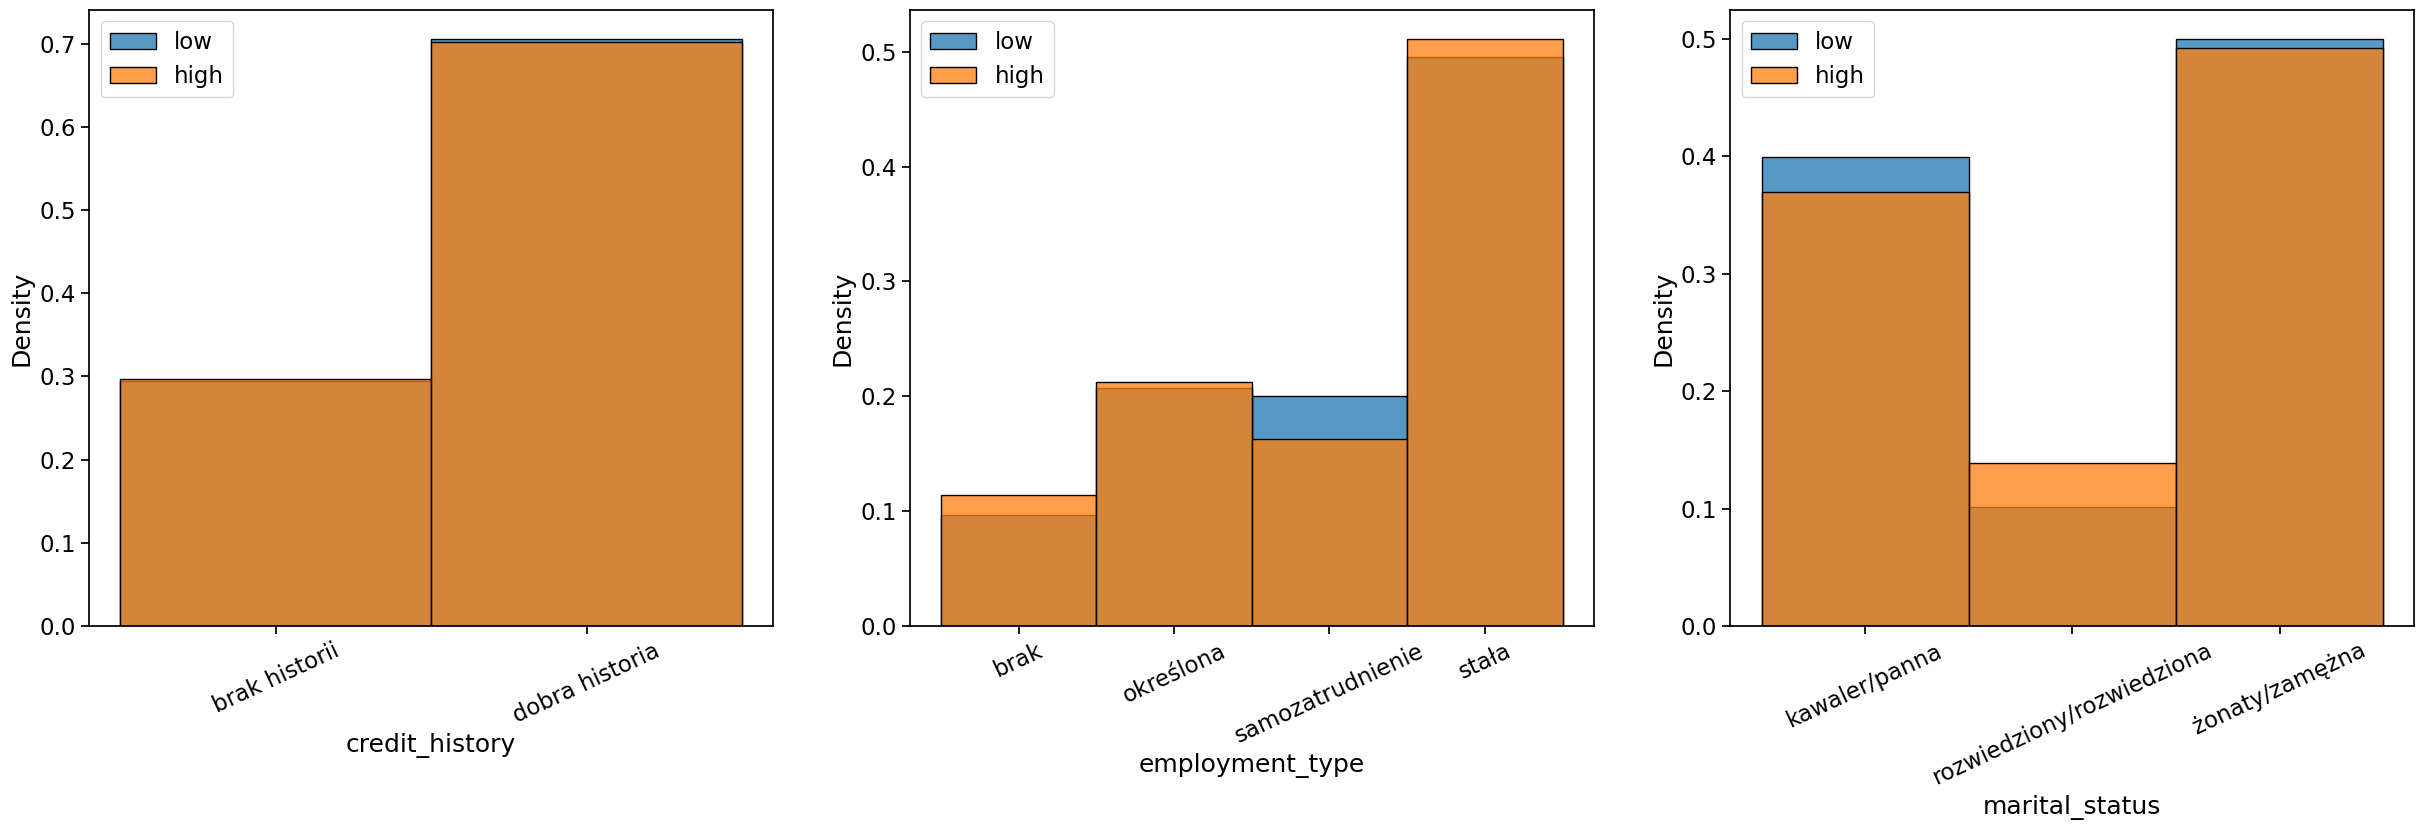

In [ ]:
cat_columns = []
for cat in data.columns:
    if data[cat].dtype == "category":
        cat_columns.append(cat)

fig, ax = plt.subplots(1, len(cat_columns), figsize=(10 * len(cat_columns), 8))
for col, cat in enumerate(cat_columns):

    sns.histplot(data = low_credit_data, x = cat, ax=ax[col], stat="density")
    sns.histplot(data = high_credit_data, x = cat, ax=ax[col], stat="density")
    ax[col].legend(("low", "high"))
    ax[col].tick_params(axis="x", rotation=25)

By looking at our charts, it seems that nothing intresting is going on \
But let's be made sure by statistical tests

In [91]:
alpha = 0.05

for feature in cat_columns:
    H0 = f"Samples of feature `{feature}` with high and low risk comes from the same distribuion"
    H1 = f"Samples of feature `{feature}` with high and low risk doesn't come from the same distribuion"

    high_risk_freq = high_credit_data[feature].value_counts() / high_credit_data[feature].count()
    low_risk_freq = low_credit_data[feature].value_counts() / low_credit_data[feature].count()

    chi_test = chisquare(high_risk_freq, low_risk_freq) # the other way around p value is a little diffrent, i don't know why

    if chi_test.pvalue >= alpha:
        display(Markdown(H0 + f"(p_value = {chi_test.pvalue})"))
    else:
        display(Markdown(H1 + f"(p_value = {chi_test.pvalue})"))

Samples of feature `credit_history` with high and low risk comes from the same distribuion(p_value = 0.9953926807566947)

Samples of feature `employment_type` with high and low risk comes from the same distribuion(p_value = 0.9997044137248249)

Samples of feature `marital_status` with high and low risk comes from the same distribuion(p_value = 0.9919847856292973)

Very high p values, not even close

### Now lets look at continous and ordered discrete features

In [ ]:
feature_mean_breakdown = pd.DataFrame()
feature_mean_breakdown["high_risk"] = high_credit_data.describe().loc["mean"]
feature_mean_breakdown["low_risk"] = low_credit_data.describe().loc["mean"]

# relative diffrence is the diffrence between means of high and low risk populations divided by std, Thanks to that we can detect intresting features 
feature_mean_breakdown["relative diffrence"] = (feature_mean_breakdown["high_risk"] - feature_mean_breakdown["low_risk"]) / data.describe().loc["std"]

display(Markdown(feature_mean_breakdown.T.to_markdown()))

|                    |        age |       income |    children |   overdue_payments |   active_loans |   years_in_job |   owns_property |   assets_value |   other_loans |   education |      city |   credit_risk |
|:-------------------|-----------:|-------------:|------------:|-------------------:|---------------:|---------------:|----------------:|---------------:|--------------:|------------:|----------:|--------------:|
| high_risk          | 40.2462    | 22573.5      |  0.981538   |           1.08745  |        3.59692 |       8.98769  |      0.598425   |  78000.3       |      0.415385 |   0.935385  | 0.827692  |       1       |
| low_risk           | 39.5028    | 23632        |  0.983669   |           0.468269 |        1.42739 |       9.54233  |      0.59592    |  80424.9       |      0.389767 |   0.912145  | 0.795866  |       0       |
| relative diffrence |  0.0752728 |    -0.108928 | -0.00172519 |           0.938884 |        1.77275 |      -0.113892 |      0.00510409 |     -0.0343824 |      0.052504 |   0.0331606 | 0.0423976 |       5.63912 |

Relative diffrence is high in `overdue_payments` and `active_loans`. \
Features `years_in_job` and `income` are also intresting. \
Let's see if we can attribute such diffrences to randomness.

In [76]:
alpha = 0.05

for feature in ["overdue_payments", "active_loans", "years_in_job", "income"]:
    H0 = f"The diffrences in means in `{feature}` are due to random chance"
    H1 = f"The diffrences in means in `{feature}` are **NOT** due to chance"

    ttest = ttest_ind(high_credit_data[feature].values, 
                low_credit_data[feature].values,
                equal_var=False,
                nan_policy="omit")
    if (ttest.pvalue >= alpha):
        display(Markdown(H0 + f"  (p_value = {ttest.pvalue})"))
    else:
        display(Markdown(H1 + f"  (p_value = {ttest.pvalue})"))

The diffrences in means in `overdue_payments` are **NOT** due to chance  (p_value = 2.312856643425494e-24)

The diffrences in means in `active_loans` are **NOT** due to chance  (p_value = 6.065341368189689e-53)

The diffrences in means in `years_in_job` are **NOT** due to chance  (p_value = 0.03172325590304079)

The diffrences in means in `income` are due to random chance  (p_value = 0.11051127158075265)

I think we can safely assume that there is *something* going on with `overdue_payments` and `active_loans`. \
I'm kinda skeptical about `years_in_job` though. 

# Summary

It seems `overdue_payments` and `active_loans` have a relation to `credit_risk`. \
Feature `years_in_job` also seems to have somethign to do with the target variable, although statistical significance is one the border on this one. \
Other features didn't show promising results.